In [ ]:
!pip install yfinance
!pip install yahoofinancials
!pip install matplotlib

Correlation indicates the the two numbers are related in some way.
Causation requires more proof that there is no lurking variable that creates the relationship.
Variance is a statistical figure that determines the average distance of a set of variables from the average value in that set. 
Variance indicates wether any stcok is fluctuating or stable any kind of variance is bad what we want is a stable function.
Normal distribution cannot be used to model stock prices because it has a negative side, and stock prices cannot fall below zero.

In [ ]:
import yfinance as yf
import yahoofinancials
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.5f}'.format

In [ ]:
sbi_df = yf.download('SBI', 
                      start='2019-03-01', 
                      end='2020-03-31'
                      )
sbi_df.to_csv('sbi.csv')
citi_df = yf.download('c', 
                      start='2019-03-01', 
                      end='2020-03-31'
                      )
citi_df.to_csv('citi.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
sbi_df = pd.read_csv('sbi.csv', parse_dates=['Date'])
citi_df = pd.read_csv('citi.csv', parse_dates=['Date'])
print(sbi_df.head(), "\n", citi_df.head())

        Date    Open    High     Low   Close  Adj Close  Volume
0 2019-03-01 8.74000 8.74000 8.70000 8.70000    8.00264    8000
1 2019-03-04 8.70000 8.73000 8.70000 8.70000    8.00264   12100
2 2019-03-05 8.73000 8.73000 8.69000 8.69000    7.99344   13600
3 2019-03-06 8.69000 8.73000 8.68000 8.72000    8.02104   18800
4 2019-03-07 8.70000 8.74000 8.70000 8.74000    8.03943   13900 
         Date     Open     High      Low    Close  Adj Close    Volume
0 2019-03-01 64.78000 65.69000 64.11000 64.47000   59.30856  14376000
1 2019-03-04 64.53000 65.30000 63.11000 63.75000   58.64621  15786600
2 2019-03-05 63.66000 63.66000 61.91000 62.93000   57.89184  18754900
3 2019-03-06 62.70000 63.07000 62.10000 62.51000   57.50547  12711200
4 2019-03-07 62.03000 62.12000 61.21000 61.90000   56.94431  15788900


In [ ]:
sbi_vol = sbi_df.Volume
sbi_date = sbi_df.iloc[:,0]
citi_vol = citi_df.Volume
citi_date = citi_df.iloc[:,0]

Text(0, 0.5, 'Volume')

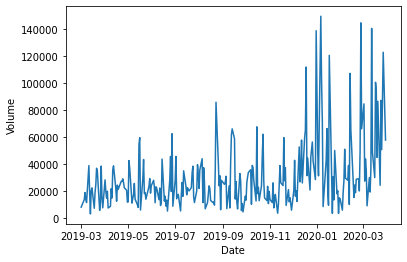

In [ ]:
# Return Graph of SBI

plt.plot(sbi_date, sbi_vol)
plt.xlabel('Date')
plt.ylabel('Volume')

Text(0, 0.5, 'Volume')

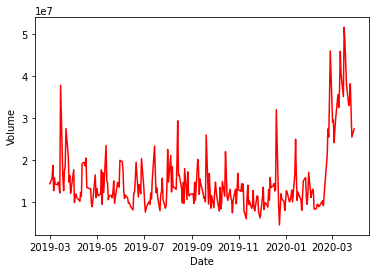

In [ ]:
# Return Graph of Citi

plt.plot(citi_date, citi_vol, 'r')
plt.xlabel('Date')
plt.ylabel('Volume')

In [ ]:
sbi_df_copy = sbi_df.copy()
sbi_df_copy.drop("Date", inplace = True, axis = 1)
citi_df_copy = citi_df.copy()
citi_df_copy.drop("Date", inplace = True, axis = 1)

# **Mean**

In [ ]:
sbi_df_copy.mean()

Open            9.05165
High            9.09568
Low             9.00923
Close           9.05205
Adj Close       8.49201
Volume      30194.87179
dtype: float64

In [ ]:
citi_df_copy.mean()

Open              68.61476
High              69.38253
Low               67.88780
Close             68.64491
Adj Close         64.02238
Volume      15115587.17949
dtype: float64

# **Variance**

In [ ]:
sbi_df_copy.var()

Open                0.10196
High                0.09370
Low                 0.11945
Close               0.09882
Adj Close           0.11879
Volume      645714826.54600
dtype: float64

In [ ]:
citi_df_copy.var()

Open                    69.13438
High                    64.14364
Low                     75.29108
Close                   69.12371
Adj Close               62.47491
Volume      61540900703695.31250
dtype: float64

# **Skew**

In [ ]:
sbi_df_copy.skew()

Open        -1.22789
High        -0.72252
Low         -1.91253
Close       -1.18889
Adj Close   -0.35139
Volume       2.28124
dtype: float64

In [ ]:
citi_df_copy.skew()

Open        -1.50696
High        -1.39259
Low         -1.61917
Close       -1.51360
Adj Close   -1.25663
Volume       2.21955
dtype: float64

# **Kurtosis**

In [ ]:
sbi_df_copy.kurtosis()

Open        3.32186
High        1.64980
Low         6.28156
Close       3.37345
Adj Close   0.15434
Volume      6.25571
dtype: float64

In [ ]:
citi_df_copy.kurtosis()

Open        3.79453
High        3.39104
Low         4.14657
Close       3.76101
Adj Close   2.95179
Volume      5.25204
dtype: float64

In [ ]:
df = pd.DataFrame({'Date': sbi_df.Date, 'Sbi': sbi_df.Close, 'Citi': citi_df.Close})
df

,Date,Sbi,Citi
0,2019-03-01,8.70000,64.47000
1,2019-03-04,8.70000,63.75000
2,2019-03-05,8.69000,62.93000
3,2019-03-06,8.72000,62.51000
4,2019-03-07,8.74000,61.90000
...,...,...,...
268,2020-03-24,7.69000,40.66000
269,2020-03-25,8.12000,41.86000
270,2020-03-26,8.47000,46.02000
271,2020-03-27,8.49000,43.80000


In [ ]:
# Correlation of Sbi and Citi

corr_df = df.corr(method='pearson')
corr_df.head()

,Sbi,Citi
Sbi,1.00000,0.71995
Citi,0.71995,1.00000
